We provide a very basic catalog inspection API that helps users to find catalogs that are available to them, as well as supporting data like timeseries, neighbors, or pre-computed cross-matches.

* OBJECT
  * If we know at catalog ingestion time that this is an object catalog, we can mark it as such.
* SOURCES
  * If we know at catalog ingestion time that this is a source catalog, we can mark it as such.
  * Source catalogs should have linked object catalogs
* ASSOCIATIONS
  * As in a more traditional relational table, these link one catalog to another for faster lookups/joins.
* INDEX
  * As in a more traditional relational table, these provide pointers to the spatial partitions for non-spatial fields (e.g. find an object by its numeric id, even if you don't know the radec)

In [2]:
from hipscat.inspection import Almanac
from hipscat.inspection import visualize_pixels

reg = Almanac(file="/data3/epyc/data3/hipscat/catalogs/ztf_mar16/almanac.xml")
reg.object_catalogs()
reg.source_catalogs()

--ALL OBJECT CATALOGS--
object (object)
  SOURCES
    > source
  ASSOCIATIONS
    > object_to_source
  INDEXES
    > object_index

--ALL SOURCE CATALOGS--
source (source)
  ASSOCIATIONS
    > ** object_to_source
  INDEXES
    > source_index



The below image is a projection of the healpix tiles in the **object** catalog. This is a coarse-grained description of a catalog.

In the example, the catalog is a sample from a larger catalog, using only a single tile.

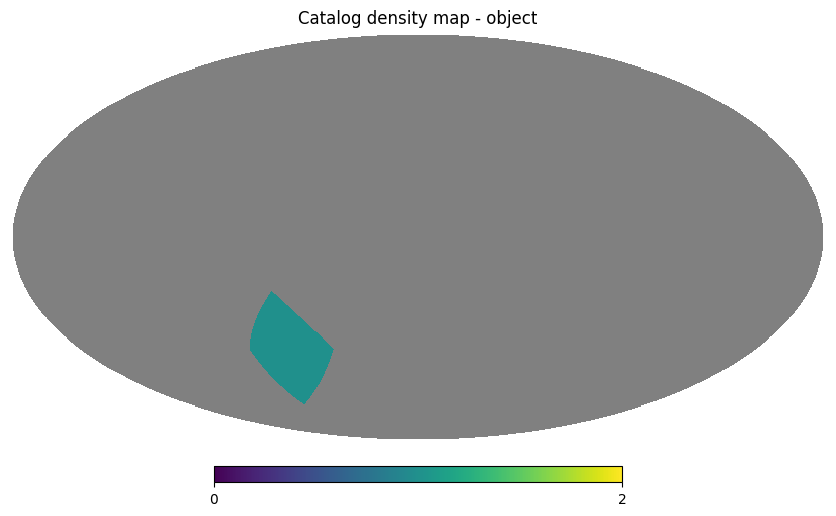

In [9]:
cat = reg.get_catalog("object")
visualize_pixels.plot_pixels(cat)

The below image is a projection of the healpix tiles in the **source** catalog. This is a coarse-grained description of a catalog.

While the **object** catalog is only a single tile, because there are orders of magnitude more detections, this is split into a few hundred tiles.

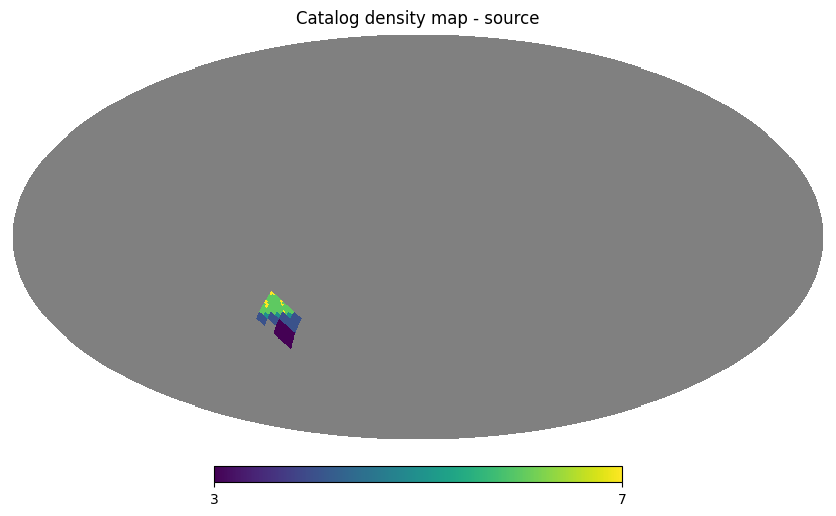

In [11]:
cat = reg.get_catalog("source")
visualize_pixels.plot_pixels(cat)

In addition, we store the locations of individual sources in the source catalog. This as a byproduct of catalog ingestion and healpix binning, and can be useful for users to see a more fine-grained distribution in their sample. Well, we **will** do that in the next week or so.